_ANOVA_

https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

In [2]:
data = pd.read_csv("PlantGrowth.csv")

In [3]:
data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [4]:
data.group.unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

<AxesSubplot:title={'center':'weight'}, xlabel='group'>

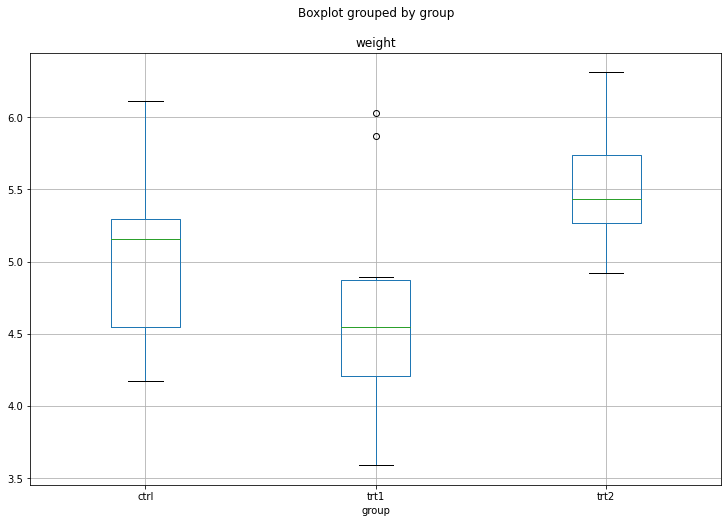

In [5]:
data.boxplot('weight', 
             by="group",
             figsize=(12,8))

In [7]:
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

In [8]:
d_data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64,
 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64,
 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [9]:
from scipy import stats
F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

In [11]:
p

0.0159099583256229

-----

## Pure Python

In [29]:
k = len(pd.unique(data.group))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('group').size()[0] #Participants in each condition

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

In [30]:
SSbetween = (sum(data.groupby('group').sum()['weight']**2)/n) - (data['weight'].sum()**2)/N

In [31]:
sum_y_squared = sum([value**2 for value in data['weight'].values])

SSwithin = sum_y_squared - sum(data.groupby('group').sum()['weight']**2)/n

In [32]:
SStotal = sum_y_squared - (data['weight'].sum()**2)/N

In [33]:
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

In [35]:
F = MSbetween/MSwithin
p = stats.f.sf(F, DFbetween, DFwithin)

In [36]:
eta_sqrd = SSbetween/SStotal
om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)